In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2  
from os import listdir 
from os.path import isfile, join 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import random 


# Initialt arbete med Fisheye-dataset

Innan det nuvarande datasetet (CCSN) valdes, påbörjades arbetet med ett annat dataset vid namn `TJNU-GRSCD`. En central utmaning med detta dataset var att alla bilder var tagna med ett **fisheye-objektiv**, vilket skapade en kraftig sfärisk förvrängning.

Koden i de efterföljande (nu bortkommenterade) cellerna representerar det undersökande arbetet för att hantera detta problem.

**Syftet med koden var att:**
1.  Använda biblioteket `defisheye` för att programmatiskt korrigera bildförvrängningen.
2.  Experimentera med olika `fov` (Field of View) värden för att hitta en optimal kompromiss mellan att behålla så mycket bildinformation som möjligt och att få en så "normal" bild som möjligt.
3.  Visualisera resultaten för att kunna fatta ett beslut om vilken korrigeringsgrad som var bäst.

Efter dessa initiala experiment insåg vi att bildkorrigeringen i sig var ett komplext problem som tog fokus från kunskapskontrollens huvudsyfte: att bygga en klassificeringsmodell. För att kunna fokusera på själva AI-modellen och arbeta med ett mer standardiserat dataset, fattades beslutet att byta till det nuvarande CCSN-datasetet, där bilderna inte lider av denna typ av förvrängning.

In [2]:



# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


# img= "./TJNU-GRSCD/train/2_altocumulus/2_altocumulus_000053.jpg"

# dtype = 'linear'
# format = 'circular'
# fov = 180
# fov2=140
# fov3=160
# pfov = 120

# image = cv2.imread(img)  
# image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
# obj2 = Defisheye(img, dtype=dtype, format=format, fov=fov2, pfov=pfov)
# obj3 = Defisheye(img, dtype=dtype, format=format, fov=fov3, pfov=pfov)

# new_image = obj.convert()
# new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

# new_image2 = obj2.convert()
# new_image2= cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

# new_image3 = obj3.convert()
# new_image3= cv2.cvtColor(new_image3, cv2.COLOR_BGR2GRAY)



# fig, axes= plt.subplots(2,2,figsize=(12,12)) 
# axes=axes.flat

# axes[0].imshow(image)
# axes[1].imshow(new_image,cmap='Greys_r')
# axes[1].set_title(f'{fov}')
# axes[2].imshow(new_image2,cmap='Greys_r')
# axes[2].set_title(f'{fov2}')
# axes[3].imshow(new_image3,cmap='Greys_r')
# axes[3].set_title(f'{fov3}')


# print(new_image2.shape)

In [3]:
# def transform_raw_image(image_file, fov): 
#     """
#     using the openCV and defisheye libraries convertes a fisheye image to rectilinear image and converts it from bgr to grey scale 
#     Returns the image as an numpy array 
#     """
#     image = cv2.imread(image_file)
#     dtype = 'linear'
#     format = 'circular'
#     pfov = 120
#     obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
#     new_image = obj.convert()
#     new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
#     return new_image
    
    

In [4]:
# path= "./TJNU-GRSCD"
# path_test=path+"/test"
# path_train=path+"/train" 

# class_dir_test=listdir(path_test)
# class_dir_train=listdir(path_train)

# test_addresses=[]
# training_addresses=[]
# class_names=[]

# for dir in class_dir_test: 
#     test_addresses.append(listdir(path_test+"/"+dir))
#     class_names.append(dir[2:])
# for dir in class_dir_train: 
#     training_addresses.append(listdir(path_train+"/"+dir))


# support_dir=[ len(x) for x in test_addresses ]
# train_support=[ len(x) for x in training_addresses ]

# print("test:", support_dir)
# print("train:",train_support)
# print("combined:", np.array(support_dir)+np.array(train_support))
# print("classes:",class_names)






In [5]:
# # Randomly selecting 10% of training data. 
# nsample_category= np.array([int(len(x)//10) for x in training_addresses ]) 

# seed(42)# set randomseed  

# transformed_data_path="./slask/" 

# fovs=[140,160,180]

# for i in range(len(class_names)): 
#     subSample = sample(training_addresses[i], nsample_category[i]) 
#     datadir= transformed_data_path+class_names[i]
#     for fov in fovs: 
#         current_datadir=datadir+f"{fov}/"
        
#         Path(current_datadir ).mkdir(parents=True, exist_ok=True) 
        
#         for sample in subSample: 
#             image=transform_raw_image(sample, fov)
#             cv2.imwrite(current_datadir+sample, image)





In [6]:
# dirpath="./CCSN_v2"
# class_dirs=listdir(dirpath)
# lists_image_names=[]
# for dir in class_dirs: 
#     lists_image_names.append(listdir(dirpath+"/"+dir))


# images= []
# y=[] 
# for  i in range(len(class_dirs)): 
#     for image_name in lists_image_names[i]: 
#         images.append(  cv2.imread( dirpath+"/"+class_dirs[i]+"/"+image_name ) ) 



In [7]:
# sizes=[M.shape for M in images] 

# data= pd.DataFrame(sizes)

# data=data.rename(columns={0: "x", 1: "y", 2: "z"})
# data.head()


# data.hist(column="x")
# data.hist(column="y")

# data['image_size']= data['x']*data['y']
# data.hist(column='image_size')



# Nytt dataset kommer här nedanför

In [8]:
import os

# VIKTIGT: Uppdatera denna sökväg till mappen där dina 11 molnmappar ligger.
# Det kan t.ex. vara "CCSN-database" eller liknande.
data_root_path = "CCSN_v2" 

print(f"Inventerar innehållet i mappen: '{data_root_path}'\n")

try:
    # Hämta en lista på alla undermappar
    class_folders = [f for f in os.listdir(data_root_path) if os.path.isdir(os.path.join(data_root_path, f))]
    class_folders.sort() # Sortera för en snyggare utskrift

    print(f"{'Molntyp (Mapp)':<20} | {'Antal bilder'}")
    print("-" * 35)

    total_images = 0
    # Loopa igenom varje mapp och räkna bilderna
    for folder in class_folders:
        folder_path = os.path.join(data_root_path, folder)
        
        # Räkna bara filer som slutar på .jpg för att undvika andra filtyper
        num_images = len([name for name in os.listdir(folder_path) if name.lower().endswith('.jpg')])
        
        print(f"{folder:<20} | {num_images}")
        total_images += num_images

    print("-" * 35)
    print(f"{'Totalt antal bilder':<20} | {total_images}")

except FileNotFoundError:
    print(f"FEL: Kunde inte hitta mappen '{data_root_path}'.")
    print("Dubbelkolla att du har angett rätt sökväg och att du kör skriptet från rätt plats.")

Inventerar innehållet i mappen: 'CCSN_v2'

Molntyp (Mapp)       | Antal bilder
-----------------------------------
Ac                   | 221
As                   | 188
Cb                   | 242
Cc                   | 268
Ci                   | 139
Cs                   | 287
Ct                   | 200
Cu                   | 182
Ns                   | 274
Sc                   | 340
St                   | 202
-----------------------------------
Totalt antal bilder  | 2543


In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm 


data_root_path = "CCSN_v2" 
img_size = 128 



print("Startar inläsning och förberedelse av bilder...")

# Hämta och sortera mapparna för att säkerställa konsekvent ordning
class_folders = [f for f in os.listdir(data_root_path) if os.path.isdir(os.path.join(data_root_path, f))]
class_folders.sort() 

# Skapa en mappning från klassnamn till siffra (våra labels)
# {'Ac': 0, 'As': 1, ...}
class_to_label = {folder_name: i for i, folder_name in enumerate(class_folders)}
print(f"Klasser som hittades: {class_to_label}")

# Tomma listor för att lagra vår data (X) och våra etiketter (y)
X = []
y = []

# Loopa igenom varje mapp (varje molntyp)
for folder_name in class_folders:
    folder_path = os.path.join(data_root_path, folder_name)
    
    # Hämta den numeriska etiketten för denna mapp
    label = class_to_label[folder_name]
    
    # Loopa igenom varje bild i mappen (med en progress bar)
    for image_file in tqdm(os.listdir(folder_path), desc=f"Läser in {folder_name}"):
        if image_file.lower().endswith('.jpg'):
            image_path = os.path.join(folder_path, image_file)
            
            try:
                # 1. Läs in bilden i gråskala
                image = cv2.imread(image_path)
                
                # 2. Ändra storlek
                resized_image = cv2.resize(image, (img_size, img_size))
                
                # 3. Platta ut från 128x128 till 1x16384
                flattened_image = resized_image.flatten()
                
                # 4. Lägg till i våra listor
                X.append(flattened_image)
                y.append(label)
                
            except Exception as e:
                print(f"  - Varning: Kunde inte bearbeta {image_path}. Fel: {e}")

# Konvertera listorna till NumPy arrays, vilket är standardformatet för Scikit-learn
X = np.array(X)
y = np.array(y)

print("\n\nInläsningen är klar!")
print(f"Form på X (data): {X.shape}")
print(f"Form på y (labels): {y.shape}")

# Vi kan också verifiera en pixel-rad
# Varje rad ska ha 128 * 128 = 16384 värden
print(f"Antal features per bild: {X.shape[1]}")

Startar inläsning och förberedelse av bilder...
Klasser som hittades: {'Ac': 0, 'As': 1, 'Cb': 2, 'Cc': 3, 'Ci': 4, 'Cs': 5, 'Ct': 6, 'Cu': 7, 'Ns': 8, 'Sc': 9, 'St': 10}


Läser in St: 100%|██████████| 202/202 [00:00<00:00, 675.53it/s]



Inläsningen är klar!
Form på X (data): (2543, 49152)
Form på y (labels): (2543,)
Antal features per bild: 49152


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time # För att mäta hur lång tid träningen tar

# --- 1. Dela upp datan ---
# Vi delar upp X och y i träningsdata (80%) och testdata (20%)
# random_state=42 säkerställer att vi får samma uppdelning varje gång vi kör koden
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data har delats upp:")
print(f"Antal träningsbilder: {X_train.shape[0]}")
print(f"Antal testbilder:     {X_test.shape[0]}")


# --- 2. Skapa och träna modellen ---
# Vi skapar en RandomForest-modell. 
# n_estimators=100 betyder att den består av 100st "beslutsträd".
# n_jobs=-1 använder alla tillgängliga processorkärnor för att snabba på träningen.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nStartar träning av RandomForest-modellen... (detta kan ta en stund)")
start_time = time.time()

# Träna modellen på träningsdatan
model.fit(X_train, y_train)

end_time = time.time()
print(f"Träningen är klar! Det tog {end_time - start_time:.2f} sekunder.")


# --- 3. Utvärdera modellen ---
print("\nUtvärderar modellens prestanda på testdatan...")

# Använd den tränade modellen för att göra prediktioner på testbilderna
y_pred = model.predict(X_test)

# Jämför modellens gissningar (y_pred) med det sanna facit (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTräffsäkerhet (Accuracy): {accuracy * 100:.2f}%")

# Skriv ut en mer detaljerad rapport
# Den visar precision, recall och f1-score för varje enskild molntyp
print("\nDetaljerad klassificeringsrapport:")
# Vi behöver klassnamnen från förra steget för att rapporten ska bli läsbar
class_names = list(class_to_label.keys())
print(classification_report(y_test, y_pred, target_names=class_names))

Data har delats upp:
Antal träningsbilder: 2034
Antal testbilder:     509

Startar träning av RandomForest-modellen... (detta kan ta en stund)
Träningen är klar! Det tog 4.51 sekunder.

Utvärderar modellens prestanda på testdatan...

Träffsäkerhet (Accuracy): 33.79%

Detaljerad klassificeringsrapport:
              precision    recall  f1-score   support

          Ac       0.17      0.11      0.14        44
          As       0.42      0.34      0.38        38
          Cb       0.40      0.56      0.47        48
          Cc       0.26      0.33      0.29        54
          Ci       0.33      0.18      0.23        28
          Cs       0.24      0.24      0.24        58
          Ct       0.47      0.78      0.58        40
          Cu       0.31      0.14      0.19        36
          Ns       0.27      0.29      0.28        55
          Sc       0.43      0.51      0.47        68
          St       0.19      0.07      0.11        40

    accuracy                           0.34    

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# --- 1. Definiera vilka hyperparametrar och värden vi vill testa ---
# Detta är vår "grid". GridSearchCV kommer testa alla möjliga kombinationer.
# Vi väljer ett litet antal värden för att det inte ska ta för lång tid.
param_grid = {
    'n_estimators': [50, 100, 200],      # Antal träd i skogen
    'max_depth': [10, 20, 30],         # Maxdjup på träden (None = ingen gräns)
    'min_samples_split': [2, 5],         # Minsta antal samples för att dela en nod
    'max_features': ['sqrt', 'log2']     # Antal features att överväga vid varje split
}

# --- 2. Skapa ett GridSearchCV-objekt ---
# Vi skapar en grundmodell att testa
base_model = RandomForestClassifier(random_state=42)

# Vi säger åt GridSearchCV att:
# - Använda vår grundmodell (estimator)
# - Testa alla kombinationer i vår param_grid
# - Använda 3-faldig korsvalidering (cv=3)
# - Använda alla processorkärnor (n_jobs=-1)
# - Vara pratsam om vad den gör (verbose=2)
grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# --- 3. Kör sökningen ---
# Detta är det tunga jobbet. Den kommer nu träna och utvärdera 3*3*3*2 = 54 olika modeller.
print("Startar GridSearchCV för att hitta bästa hyperparametrar...")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print(f"GridSearchCV är klar! Det tog {end_time - start_time:.2f} sekunder.")

# --- 4. Visa resultatet ---
print("\nBästa hyperparametrarna som hittades:")
print(grid_search.best_params_)

print(f"\nBästa träffsäkerhet under korsvalidering: {grid_search.best_score_ * 100:.2f}%")

# --- 5. Använd den bästa modellen för att utvärdera på testdatan ---
print("\nUtvärderar den bästa modellen på den slutgiltiga testdatan...")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Träffsäkerhet (Accuracy) med bästa modellen: {accuracy_best * 100:.2f}%")

print("\nDetaljerad klassificeringsrapport för bästa modellen:")
print(classification_report(y_test, y_pred_best, target_names=class_names))

Startar GridSearchCV för att hitta bästa hyperparametrar...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
GridSearchCV är klar! Det tog 280.27 sekunder.

Bästa hyperparametrarna som hittades:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Bästa träffsäkerhet under korsvalidering: 32.50%

Utvärderar den bästa modellen på den slutgiltiga testdatan...
Träffsäkerhet (Accuracy) med bästa modellen: 33.79%

Detaljerad klassificeringsrapport för bästa modellen:
              precision    recall  f1-score   support

          Ac       0.19      0.11      0.14        44
          As       0.45      0.34      0.39        38
          Cb       0.36      0.52      0.42        48
          Cc       0.24      0.33      0.28        54
          Ci       0.45      0.18      0.26        28
          Cs       0.23      0.21      0.22        58
          Ct       0.47      0.78      0.58        40
          Cu       0.18      0.06      0.09        3

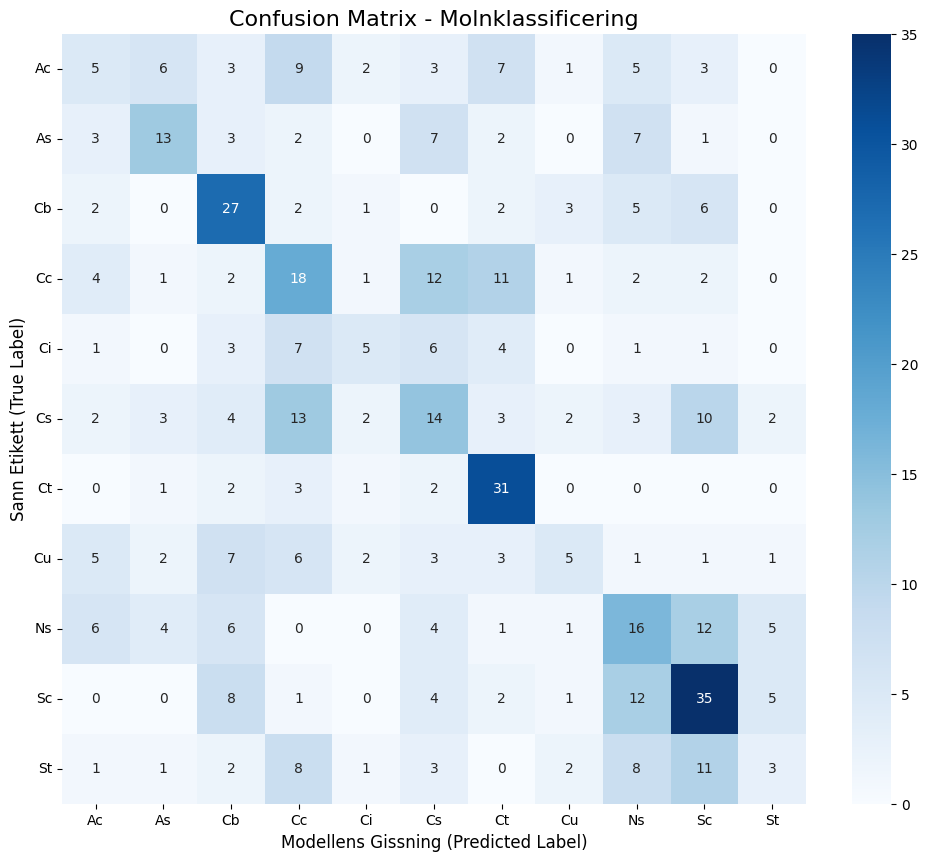

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Om du inte har seaborn installerat, kör: pip install seaborn

# 1. Beräkna confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Skapa en finare plot med Seaborn
plt.figure(figsize=(12, 10)) # Skapa en lite större figur för att allt ska få plats

sns.heatmap(cm, 
            annot=True,      # Visa siffrorna i varje cell
            fmt='d',         # Formatera siffrorna som heltal
            cmap='Blues',    # Använd en blå färgskala
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Confusion Matrix - Molnklassificering', fontsize=16)
plt.ylabel('Sann Etikett (True Label)', fontsize=12)
plt.xlabel('Modellens Gissning (Predicted Label)', fontsize=12)
plt.yticks(rotation=0)
plt.show()

Visar 9 bilder där modellen gissade RÄTT:



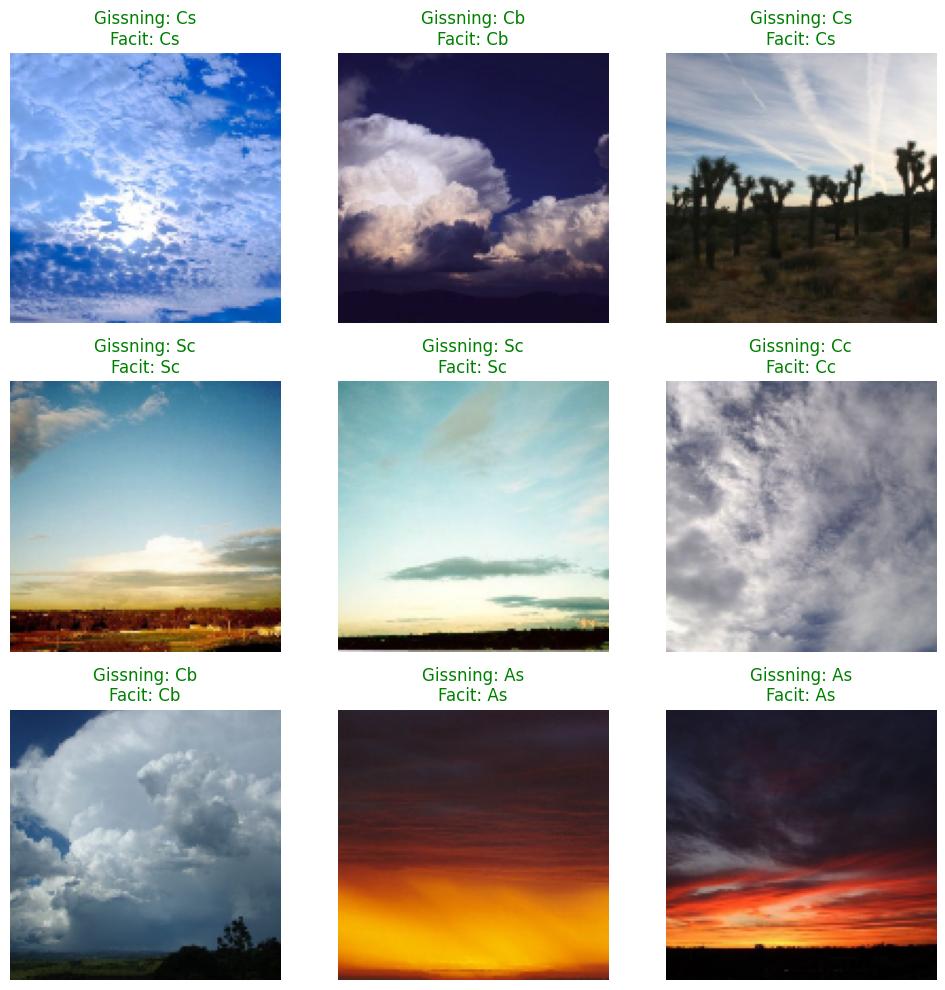

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Hitta index för alla korrekta prediktioner
correct_indices = np.where(y_pred == y_test)[0]

# Välj ut 9 slumpmässiga korrekta bilder att visa
random_correct_indices = random.sample(list(correct_indices), 9)

print("Visar 9 bilder där modellen gissade RÄTT:\n")

plt.figure(figsize=(10, 10))
for i, index in enumerate(random_correct_indices):
    plt.subplot(3, 3, i + 1)
    
    # Hämta den platta bilden från test-setet och gör om den till 128x128
    bgr_image = X_test[index].reshape(128, 128, 3)
    
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    # Hämta sann och predikterad etikett
    true_label = class_names[y_test[index]]
    predicted_label = class_names[y_pred[index]]
    
    plt.imshow(rgb_image)
    plt.title(f"Gissning: {predicted_label}\nFacit: {true_label}", color="green")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Om du använde GridSearchCV, hämta den bästa modellen så här:
# best_model = grid_search.best_estimator_

# Om du tränade en enkel modell, använd den variabeln istället:
# best_model = model 

# Definiera ett filnamn
model_filename = 'cloud_classifier_model.joblib'

# Spara modellen till filen
# Se till att du använder rätt variabelnamn (antingen 'model' eller 'best_model')
joblib.dump(model, model_filename)

print(f"Modellen har sparats till filen: '{model_filename}'")

Modellen har sparats till filen: 'cloud_classifier_model.joblib'
